In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the extracted dataset
# dataset_path = 'E:\\Sliit\\3rd yr 2nd sem\\DP2\\data set\\designed\\blnw-images-224'
dataset_path = 'E:\\Sliit\\3rd yr 2nd sem\\DP2\\data set\\real'
dataset_path

'E:\\Sliit\\3rd yr 2nd sem\\DP2\\data set\\real'

In [11]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Adjust the target size as needed
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 795 images belonging to 3 classes.
Found 197 images belonging to 3 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
25/25 [==============================] - 31s 1s/step - loss: 0.9587 - accuracy: 0.5459 - val_loss: 0.6259 - val_accuracy: 0.7614
Epoch 2/10
25/25 [==============================] - 9s 364ms/step - loss: 0.3408 - accuracy: 0.9170 - val_loss: 0.1745 - val_accuracy: 0.9543
Epoch 3/10
25/25 [==============================] - 10s 382ms/step - loss: 0.1804 - accuracy: 0.9484 - val_loss: 0.1167 - val_accuracy: 0.9797
Epoch 4/10
25/25 [==============================] - 9s 370ms/step - loss: 0.1205 - accuracy: 0.9648 - val_loss: 0.1348 - val_accuracy: 0.9695
Epoch 5/10
25/25 [==============================] - 9s 365ms/step - loss: 0.1096 - accuracy: 0.9686 - val_loss: 0.0960 - val_accuracy: 0.9797
Epoch 6/10
25/25 [==============================] - 9s 361ms/step - loss: 0.0929 - accuracy: 0.9686 - val_loss: 0.0386 - val_accuracy: 0.9898
Epoch 7/10
25/25 [==============================] - 9s 362ms/step - loss: 0.0777 - accuracy: 0.9774 - val_loss: 0.0406 - val_accuracy: 0.9949
Epoch 8

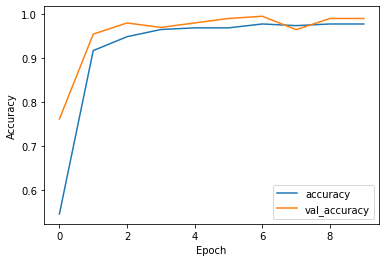

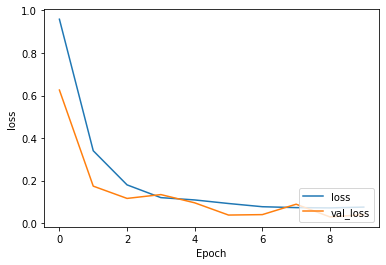

In [14]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()


In [15]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'E:\\Sliit\\3rd yr 2nd sem\\DP2\\data set\\testdata',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to preserve order
)



Found 485 images belonging to 3 classes.


In [24]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


16/16 [==============================] - 40s 3s/step - loss: 8.4633 - accuracy: 0.5423
Test Loss: 8.4633
Test Accuracy: 0.5423


In [25]:
predictions = model.predict(test_generator)


16/16 [==============================] - 25s 2s/step
